### **PROBLEM STATEMENT !!!**

**The Estimating Data Science Job Salaries Based on the Experience Level**




In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
DataScience_salaries_Dataset = pd.read_csv('DataScience_salaries_Dataset.csv')

DataScience_salaries_Dataset.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2021,MI,FT,Data Scientist,CL,100.0,CL,L,40038.0
1,2021,MI,FT,BI Data Analyst,HU,50.0,US,L,36259.0
2,2020,MI,FT,Data Scientist,HU,50.0,HU,L,35735.0
3,2021,MI,FT,ML Engineer,JP,50.0,JP,S,77364.0
4,2022,SE,FT,Lead Machine Learning Engineer,IN,50.0,IN,L,95386.0


The ***Shape Function*** it used to displays the numbers of the columns and the numbers of rows in the dataset of the Data Science Salaries

In [6]:
DataScience_salaries_Dataset.shape

(14838, 9)

*The Dataset contains  9 columns and 14838 rows*


---
The below command is used to check for the null values in each column and

display the ***sum*** of all null values in each *column*



In [7]:
DataScience_salaries_Dataset.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
remote_ratio          1
company_location      0
company_size          0
salary_in_usd         0
dtype: int64

*There's one null value !!*


---

Will be used the below command to delete the rows with empty values because the dataset is large and there are only a few empty rows. This is the best approach for this case study compared to replacing with mean or random values.


In [8]:
DataScience_salaries_Dataset = DataScience_salaries_Dataset.dropna()



---

*The Display command will be used to check if the null value has been removed and if there's any other null value ...*

In [9]:
DataScience_salaries_Dataset.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_in_usd         0
dtype: int64

*The below command will check the data type for each column*

In [10]:
DataScience_salaries_Dataset.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
salary_in_usd         float64
dtype: object



---
*There's a three data type found which includes int, object, and float*


### ***EDA (Exploratory Data Analysis)***



---


Visualizations are utilized to comprehend the connection between the target variable and the features, along with quantitative measures like correlation coefficient and p-value. The visual elements encompass regression plots, boxplots, and more.



---
*Calculate different summary statistics for a DataFrame. here, only features containing numeric data will be taken .*


In [11]:
DataScience_salaries_Dataset.describe()

,work_year,remote_ratio,salary_in_usd
count,14837.000000,14837.000000,14837.000000
mean,2023.138977,32.762688,149871.273079
std,0.700760,46.489067,69015.611767
min,2020.000000,0.000000,0.333000
25%,2023.000000,0.000000,102000.000000
50%,2023.000000,0.000000,141300.000000
75%,2024.000000,100.000000,185900.000000
max,2024.000000,100.000000,800000.000000




---
The descriptive analysis is to identify incorrect
entries and anomalies. This analysis also provides an overview of the numerical data. Certain data in the dataset may be impure or of low quality



---

# The "minimum salary" is listed as 0.333 $.
### *This entry may be incorrect (or an Outlier).*



---



Here is how to analyze and solve this issue !!

---



In [12]:
#Search the salary values that equal 0.333 $, If it is found, update it to 1500.0 $



DataScience_salaries_Dataset.loc[DataScience_salaries_Dataset['salary_in_usd'] == 0.333000, 'salary_in_usd'] = 1500.0



---
Based on the dataset the minimum salaries of data
science can be between 1400.0 USD and 1600.0 USD, so based on that the predictive minimum here is 1500.0



---



# *Here agin... there's uncorrect salary which is the minimum salary is 1.333000 $ which is not an acceptable price*

In [13]:
DataScience_salaries_Dataset.describe()

,work_year,remote_ratio,salary_in_usd
count,14837.000000,14837.000000,14837.000000
mean,2023.138977,32.762688,149871.374155
std,0.700760,46.489067,69015.393358
min,2020.000000,0.000000,1.333000
25%,2023.000000,0.000000,102000.000000
50%,2023.000000,0.000000,141300.000000
75%,2024.000000,100.000000,185900.000000
max,2024.000000,100.000000,800000.000000


In [14]:
#Here will be searching for the salary value < 1500.0 $, if it is found, update it to 1500.0 This ensures the minimum salary is 1500.0$.
DataScience_salaries_Dataset.loc[DataScience_salaries_Dataset['salary_in_usd'] < 1500.0, 'salary_in_usd'] = 1500.0

In [15]:
DataScience_salaries_Dataset.describe()

,work_year,remote_ratio,salary_in_usd
count,14837.000000,14837.000000,14837.000000
mean,2023.138977,32.762688,149871.475163
std,0.700760,46.489067,69015.175094
min,2020.000000,0.000000,1500.000000
25%,2023.000000,0.000000,102000.000000
50%,2023.000000,0.000000,141300.000000
75%,2024.000000,100.000000,185900.000000
max,2024.000000,100.000000,800000.000000




---


As it is display above that now the minimum salary is 1500.0 $



---





*Here below are the summary statistics for categorical values.*

In [16]:
DataScience_salaries_Dataset.describe(include = 'object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,14837,14837,14837,14837,14837,14837
unique,4,4,153,88,77,3
top,SE,FT,Data Engineer,US,US,M
freq,9695,14771,3161,12925,12974,13673




---



# **Regression plot**


---

### This regression plot shows the correlation between the ***work year*** and ***Salary***.


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

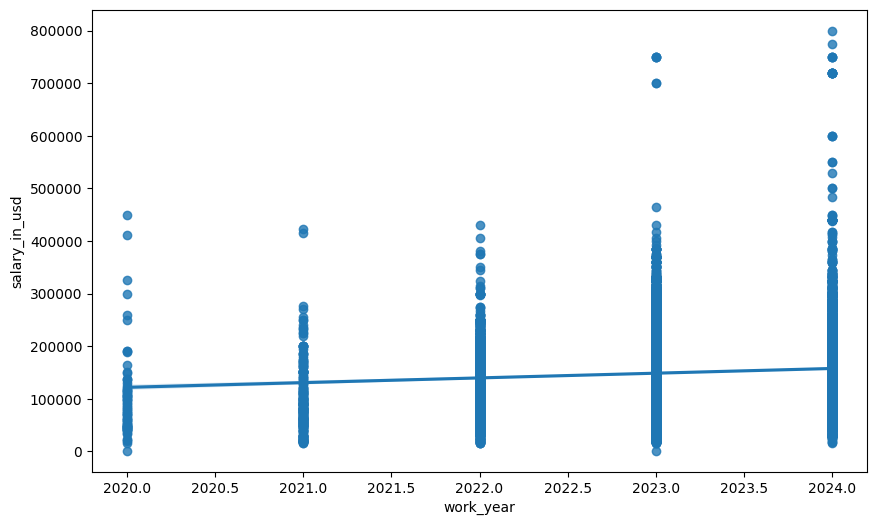

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="work_year", y="salary_in_usd", data=DataScience_salaries_Dataset)

***The plot above illustrates an annual increase in salary indicators.***


---



In [18]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(DataScience_salaries_Dataset['work_year'], DataScience_salaries_Dataset['salary_in_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.09097055016597179  with a P-value of P = 1.2135210826853394e-28


The above Pearson correlation coefficient measures the linear relationship between two variables. In this case, it appears that there is a very weak positive correlation (0.09) between work_year and salary_in_usd, and the p-value is extremely small, indicating that this correlation is statistically significant.


---



<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

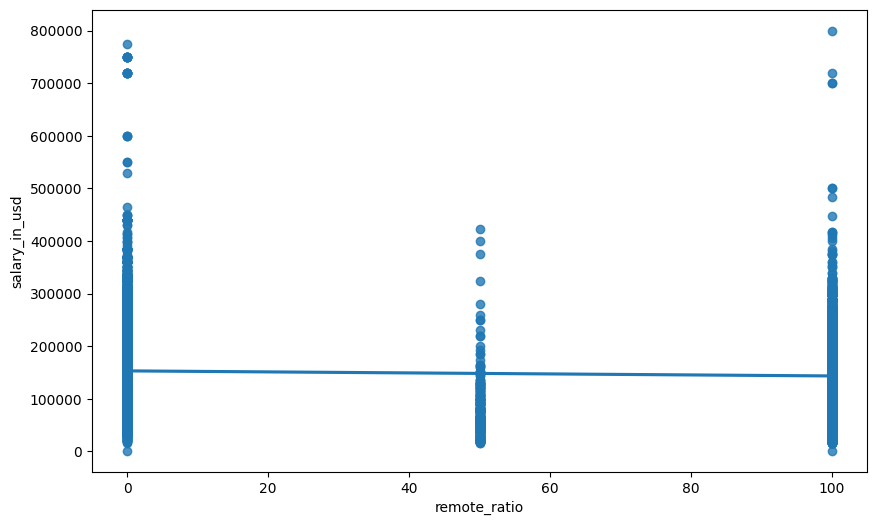

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x="remote_ratio", y="salary_in_usd", data=DataScience_salaries_Dataset)

In [20]:
pearson_coef, p_value = stats.pearsonr(DataScience_salaries_Dataset['remote_ratio'], DataScience_salaries_Dataset['salary_in_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06482419061737191  with a P-value of P = 2.707378223722968e-15


The The above Pearson correlation coefficient  shows that there is a weak negative correlation (approximately -0.065) between remote work ratio and salary in USD. This suggests that as the remote work ratio increases, the salary in USD tends to decrease slightly, but the correlation is weak. The extremely small p-value indicates that this correlation is statistically significant, meaning it's unlikely to be due to random chance.


---



# Box Plot
The estimating data science job salaries based on experience level using the provided features, which primarily focus on the following :

*   Experience Level
*   Employment Type
*   Company size






---

The below box plot shows the distribution of salaries across different levels of experience

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

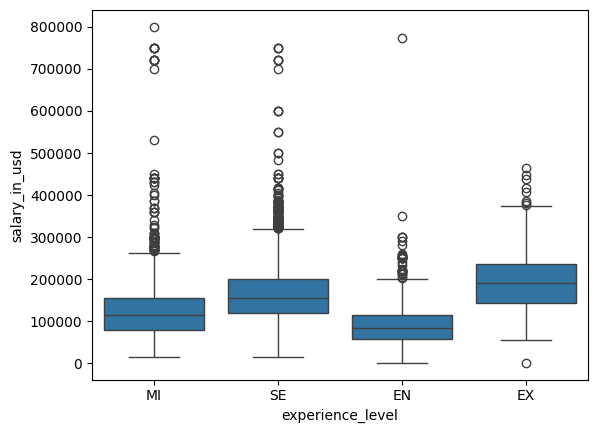

In [21]:
sns.boxplot(x="experience_level", y="salary_in_usd", data=DataScience_salaries_Dataset)

**The Box Plot above shows that salary differences within the dataset are influenced by the level of experience.The that people with more experience generally earn higher salaries. However, there's still a lot of variation within each experience level category.**


---



<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

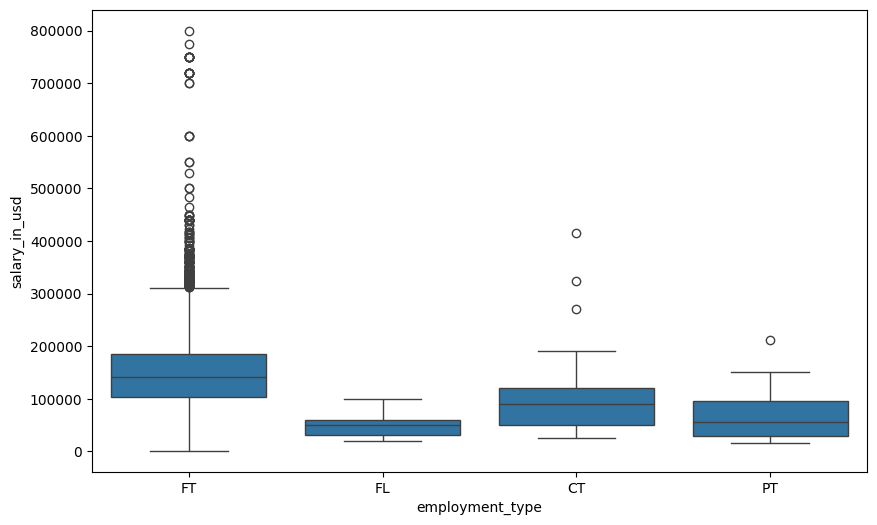

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x="employment_type", y="salary_in_usd", data=DataScience_salaries_Dataset)

The above plot box shows how salary distributions vary across different types of employment within the dataset. (FT) Full-time employees generally have higher median salaries compared to part-time and contract employees. However, there is considerable variability within each employment type, as evidenced by the presence of outliers.


---



<Axes: xlabel='company_size', ylabel='salary_in_usd'>

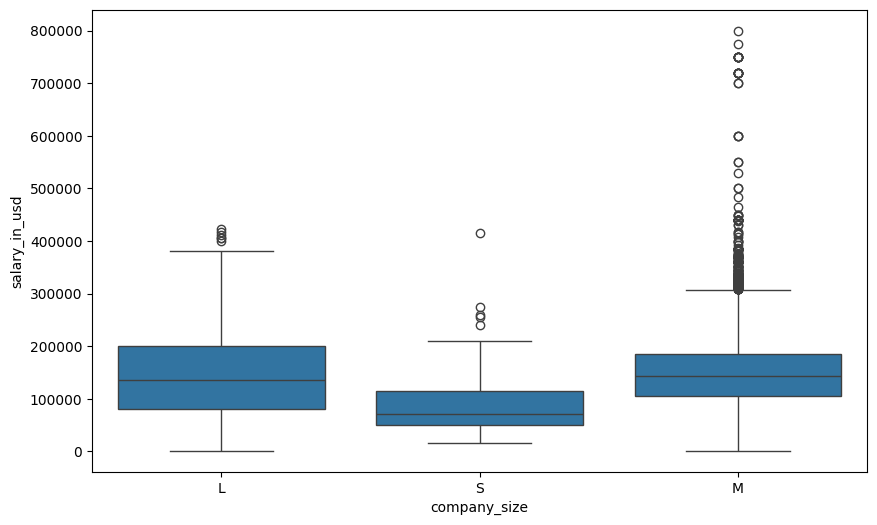

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="company_size", y="salary_in_usd", data=DataScience_salaries_Dataset)

The above Box plot display how salary distributions vary across different company sizes within the dataset. Generally, larger companies tend to offer higher median salaries compared to smaller ones.

---



# **Data Transformation**

*The process of data transformation involves label encoding of categorical features in the training set. **Label encoding** is necessary to **convert categorical data into numerical data**, as machine learning models can only understand numerical data and not textual data.*


---



# *Here is the data preprocessing...*


---



In [24]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
DataScience_salaries_Dataset.experience_level = labelencoder.fit_transform(DataScience_salaries_Dataset.experience_level)
DataScience_salaries_Dataset.employment_type = labelencoder.fit_transform(DataScience_salaries_Dataset.employment_type)
DataScience_salaries_Dataset.job_title = labelencoder.fit_transform(DataScience_salaries_Dataset.job_title)

DataScience_salaries_Dataset.employee_residence = labelencoder.fit_transform(DataScience_salaries_Dataset.employee_residence)

DataScience_salaries_Dataset.company_location = labelencoder.fit_transform(DataScience_salaries_Dataset.company_location)
DataScience_salaries_Dataset.company_size = labelencoder.fit_transform(DataScience_salaries_Dataset.company_size)





In [25]:
DataScience_salaries_Dataset.head(10)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2021,2,2,89,15,100.0,14,0,40038.0
1,2021,2,2,21,38,50.0,74,0,36259.0
2,2020,2,2,89,38,50.0,34,0,35735.0
3,2021,2,2,114,47,50.0,42,2,77364.0
4,2022,3,2,113,42,50.0,38,0,95386.0
5,2021,2,2,114,47,50.0,42,2,63711.0
6,2021,3,2,86,42,50.0,38,0,94665.0
7,2022,0,2,89,38,100.0,34,1,17684.0
8,2022,1,2,108,42,50.0,38,0,76309.0
9,2022,0,2,144,47,50.0,42,0,41809.0


# *Reviewing the remaining features and implementing label encoding for all categorical features*


---



# **Data Transformation**

Normalization: which z-score used for scaling down the features between the range of -1 and 1. This helps the model make better predictions as it is easy to understand.




In [26]:
import scipy.stats as stats
DataScience_salaries_Dataset = stats.zscore(DataScience_salaries_Dataset)

In [27]:
DataScience_salaries_Dataset

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,-3.052471,-0.533489,0.026006,0.470290,-3.246037,1.446353,-3.215427,-3.441951,-1.591493
1,-3.052471,-0.533489,0.026006,-1.480085,-2.043251,0.370795,0.358590,-3.441951,-1.646251
2,-4.479542,-0.533489,0.026006,0.470290,-2.043251,0.370795,-2.024088,-3.441951,-1.653844
3,-3.052471,-0.533489,0.026006,1.187340,-1.572595,0.370795,-1.547552,3.835316,-1.050637
4,-1.625400,0.604104,0.026006,1.158658,-1.834070,0.370795,-1.785820,-3.441951,-0.789498
...,...,...,...,...,...,...,...,...,...
14833,-1.625400,-0.533489,0.026006,-1.193265,-2.304726,1.446353,-2.381489,0.196683,-1.954295
14834,-4.479542,-1.671081,0.026006,2.219892,-0.892759,-0.704763,-3.394128,0.196683,-2.149911
14835,-3.052471,-2.808674,0.026006,1.273386,0.100847,1.446353,0.179889,-3.441951,-1.954295
14836,-1.625400,-2.808674,0.026006,-0.791717,-1.990956,-0.704763,-1.964521,-3.441951,-1.954295


After applying z-score normalization, each feature in the dataset will have a mean of 0 and a standard deviation of 1. This normalization is helpful for standardizing the scales of different features, making them comparable and ensuring that no single feature dominates the analysis due to its scale. It's commonly used in statistical analysis and machine learning algorithms.


---



### Dividing the data for DataScience and testing accordingly. X takes all features while Y takes the target variable

*There are 9 actual columns [0-8 index]; 8 are predictor variables and 1 is the target variable*

In [40]:
x_train=DataScience_salaries_Dataset.iloc[:,0:7]
y_train=DataScience_salaries_Dataset.iloc[:,8]

In [41]:
x_train.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location
0,-3.052471,-0.533489,0.026006,0.470290,-3.246037,1.446353,-3.215427
1,-3.052471,-0.533489,0.026006,-1.480085,-2.043251,0.370795,0.358590
2,-4.479542,-0.533489,0.026006,0.470290,-2.043251,0.370795,-2.024088
3,-3.052471,-0.533489,0.026006,1.187340,-1.572595,0.370795,-1.547552
4,-1.625400,0.604104,0.026006,1.158658,-1.834070,0.370795,-1.785820


In [42]:
y_train.head()

0   -1.591493
1   -1.646251
2   -1.653844
3   -1.050637
4   -0.789498
Name: salary_in_usd, dtype: float64

In [43]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data  # 30% for testing is used
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

# **Fit Model - Multiple Linear Regression:**




*1.   Importing the necessary function: Import the LinearRegression class from sklearn.linear_model.*

*2. Creating the model object: Instantiate the LinearRegression model.*

*3. Fitting the model: Use the fit method with X_train (input features) and Y_train (target labels) to train the model. During this process, the model learns the coefficients to predict target values based on input features.*









In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

*Making salary predictions using the testing set (Fit t o MLR)*

In [45]:
Y_pred_MLR = model_mlr.predict(X_test)

# Multiple Linear Regression (MLR)


*When evaluating a Multiple Linear Regression (MLR) model, it is important to calculate the Mean Square Error (MSE) to assess the model's accuracy and performance.*

In [46]:
mse_MLR = mean_squared_error(Y_test, Y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse_MLR)

The mean square error for Multiple Linear Regression:  0.8001958180743436




---


*Here is to Calculating the Mean Absolute Error for the MLR model*

In [47]:
mae_MLR= mean_absolute_error(Y_test, Y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae_MLR)

The mean absolute error for Multiple Linear Regression:  0.6699099398082896


# Random Forest Regressor



  * Assessing various models including Random Forest Regressor.
  *   Contacting random forest model and fitting it with the training data.



In [48]:
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(X_train,Y_train)

## *Predicting the DataScience Salary using the testing data*

In [49]:
Y_pred_RF = model_rf.predict(X_test)

# Random Forest Evaluation
*Calculating the Mean Square Error for Random Forest Model*


In [50]:
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The mean square error of salary and predicted value is: ', mse_RF)

The mean square error of salary and predicted value is:  0.6592189018383513




---


*Calculating the Mean Absolute Error for Random Forest Model*

In [51]:
mae_RF= mean_absolute_error(Y_test, Y_pred_RF)
print('The mean absolute error of salary and predicted value is: ', mae_RF)

The mean absolute error of salary and predicted value is:  0.5974921662760422




---


# LASSO Model

*Calling the model and fitting the training data*

In [53]:
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,Y_train)

*Salary prediction uisng testing data*

In [54]:
Y_pred_lasso = model_lm.predict(X_test)

# LASSO Evaluation (checking another model)
Mean Absolute Error for LASSO Model

In [56]:
mae_lasso= mean_absolute_error(Y_test, Y_pred_lasso)
print('The mean absolute error of salary and predicted value is: ', mae_lasso)

The mean absolute error of salary and predicted value is:  0.7463074302048321


*Mean Squared Error for the LASSO Model*

In [57]:
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print('The mean square error of salary and predicted value is: ', mse_lasso)

The mean square error of salary and predicted value is:  0.9469707312832581


In [58]:
scores = [('MLR', mae_MLR),
          ('Random Forest', mae_RF),
          ('LASSO', mae_lasso)
         ]

In [59]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.669910
1,Random Forest,0.597492
2,LASSO,0.746307


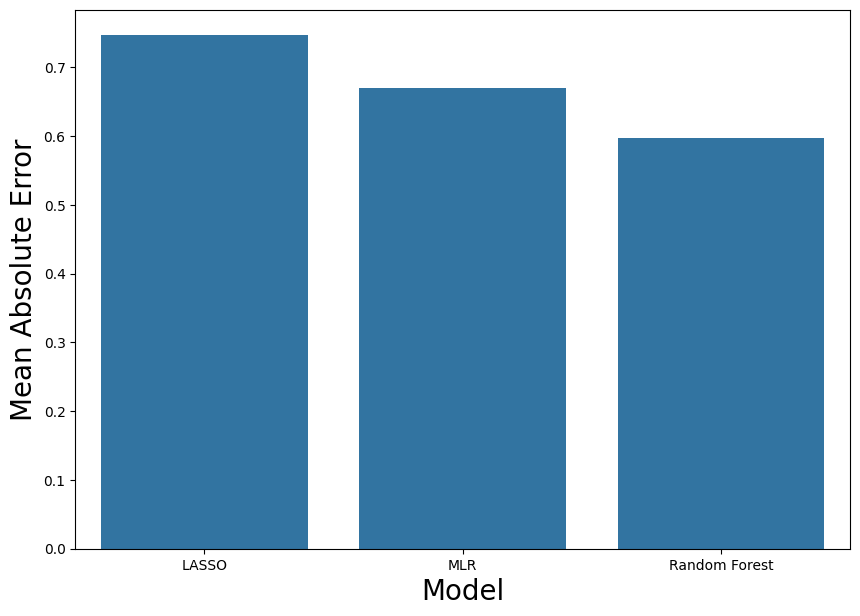

In [60]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()



---


Based on the MAE, it is concluded that the Random Forest is the best regression model for predicting the data Science Based on the 12th predictor variables


---



In [63]:
num = int(input("Enter a number:"))
n = num

def armstrongg(num):
  sum = 0
  while (num > 0):
    digit = int(num % 10)
    sum = pow(digit,3) + sum
    num = int(num / 10)
  return (sum)

ans = armstrongg(num)
print(n)
if (ans == n):
  print("It is an Armstrong number")
else:
  print("It is not an Armstrong number")

Enter a number:153
153
It is an Armstrong number
